**Molecule Outlier Detection**

In [ ]:
#Mounting google drive for saving the models after training 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries 
import pandas as pd 
import numpy as np 

from scipy import stats
from sklearn import svm # library for outlier detection 
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from scipy.stats import norm
%matplotlib inline 
import seaborn as sns 
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pd.set_option('float_format', '{:f}'.format)
pd.set_option('max_columns',250)
pd.set_option('max_rows',150)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Eikon_TakeHome/molecules_JD.csv") #importing the csv from drive

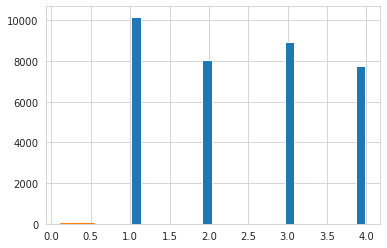

In [ ]:
plt.hist(df.SYS_0	, bins = 20 , rwidth = 0.8)
rng = np.arange(df.HTS_3.min(), df.HTS_3.max(), 0.0001)
plt.plot(rng, norm.pdf(rng,df.HTS_3.mean(),df.HTS_3.std()))

    No. of rows : 34960 
    No. of columns : 1025 

    The last 3 column with sys --> represents the system state 


In [ ]:
df = df.drop('Unnamed: 0',axis = 1 )  #dropping the Unnamed column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34960 entries, 0 to 34959
Columns: 1024 entries, Molecule Name to SYS_2
dtypes: float64(1023), object(1)
memory usage: 273.1+ MB


In [ ]:
df.describe()

,HTS_0,HTS_1,HTS_2,HTS_3,HTS_4,HTS_5,HTS_6,HTS_7,HTS_8,HTS_9,HTS_10,HTS_11,HTS_12,HTS_13,HTS_14,HTS_15,HTS_16,HTS_17,HTS_18,HTS_19,HTS_20,HTS_21,HTS_22,HTS_23,HTS_24,HTS_25,HTS_26,HTS_27,HTS_28,HTS_29,HTS_30,HTS_31,HTS_32,HTS_33,HTS_34,HTS_35,HTS_36,HTS_37,HTS_38,HTS_39,HTS_40,HTS_41,HTS_42,HTS_43,HTS_44,HTS_45,HTS_46,HTS_47,HTS_48,HTS_49,HTS_50,HTS_51,HTS_52,HTS_53,HTS_54,HTS_55,HTS_56,HTS_57,HTS_58,HTS_59,HTS_60,HTS_61,HTS_62,HTS_63,HTS_64,HTS_65,HTS_66,HTS_67,HTS_68,HTS_69,HTS_70,HTS_71,HTS_72,HTS_73,HTS_74,HTS_75,HTS_76,HTS_77,HTS_78,HTS_79,HTS_80,HTS_81,HTS_82,HTS_83,HTS_84,HTS_85,HTS_86,HTS_87,HTS_88,HTS_89,HTS_90,HTS_91,HTS_92,HTS_93,HTS_94,HTS_95,HTS_96,HTS_97,HTS_98,HTS_99,HTS_100,HTS_101,HTS_102,HTS_103,HTS_104,HTS_105,HTS_106,HTS_107,HTS_108,HTS_109,HTS_110,HTS_111,HTS_112,HTS_113,HTS_114,HTS_115,HTS_116,HTS_117,HTS_118,HTS_119,HTS_120,HTS_121,HTS_122,HTS_123,HTS_124,...,HTS_898,HTS_899,HTS_900,HTS_901,HTS_902,HTS_903,HTS_904,HTS_905,HTS_906,HTS_907,HTS_908,HTS_909,HTS_910,HTS_911,HTS_912,HTS_913,HTS_914,HTS_915,HTS_916,HTS_917,HTS_918,HTS_919,HTS_920,HTS_921,HTS_922,HTS_923,HTS_924,HTS_925,HTS_926,HTS_927,HTS_928,HTS_929,HTS_930,HTS_931,HTS_932,HTS_933,HTS_934,HTS_935,HTS_936,HTS_937,HTS_938,HTS_939,HTS_940,HTS_941,HTS_942,HTS_943,HTS_944,HTS_945,HTS_946,HTS_947,HTS_948,HTS_949,HTS_950,HTS_951,HTS_952,HTS_953,HTS_954,HTS_955,HTS_956,HTS_957,HTS_958,HTS_959,HTS_960,HTS_961,HTS_962,HTS_963,HTS_964,HTS_965,HTS_966,HTS_967,HTS_968,HTS_969,HTS_970,HTS_971,HTS_972,HTS_973,HTS_974,HTS_975,HTS_976,HTS_977,HTS_978,HTS_979,HTS_980,HTS_981,HTS_982,HTS_983,HTS_984,HTS_985,HTS_986,HTS_987,HTS_988,HTS_989,HTS_990,HTS_991,HTS_992,HTS_993,HTS_994,HTS_995,HTS_996,HTS_997,HTS_998,HTS_999,HTS_1000,HTS_1001,HTS_1002,HTS_1003,HTS_1004,HTS_1005,HTS_1006,HTS_1007,HTS_1008,HTS_1009,HTS_1010,HTS_1011,HTS_1012,HTS_1013,HTS_1014,HTS_1015,HTS_1016,HTS_1017,HTS_1018,HTS_1019,SYS_0,SYS_1,SYS_2
count,34955.000000,34955.000000,34960.000000,34414.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34960.000000,34960.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34960.000000,34955.000000,34960.000000,34960.000000,34960.000000,34955.000000,34955.000000,34955.000000,34960.000000,34960.000000,34960.000000,34955.000000,34955.000000,34960.000000,34955.000000,34960.000000,34960.000000,34960.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34960.000000,34960.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34960.000000,34955.000000,34955.000000,34960.000000,34960.000000,34960.000000,34960.000000,34955.000000,34960.000000,34960.000000,34955.000000,34955.000000,34955.000000,34960.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34960.000000,34955.000000,34955.000000,34955.000000,34955.000000,34960.000000,34960.000000,34955.000000,34955.000000,34955.000000,34960.000000,34960.000000,34955.000000,34960.000000,34960.000000,34960.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34960.000000,34960.000000,34955.000000,34955.000000,34114.000000,34955.000000,34955.000000,34955.000000,34960.000000,34955.000000,34955.000000,34960.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34960.000000,34955.000000,34955.000000,34960.000000,34960.000000,34960.000000,34955.000000,34960.000000,34960.000000,...,34955.000000,34955.000000,34960.000000,34955.000000,34955.000000,34955.000000,34960.000000,34955.000000,34960.000000,34960.000000,34960.000000,34955.000000,34955.000000,34960.000000,34955.000000,34955.000000,34955.000000,34960.000000,34955.000000,34955.000000,34955.000000,34955.000000,34960.000000,34955.000000,34955.000000,34960.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,3

In [ ]:
#df = df.dropna(axis=0)
data = df.copy()
data = data.drop('Molecule Name',axis = 1 )  #Dropping the Molecule Name column as it is not relevant for outlier detection

# Data Visualization

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

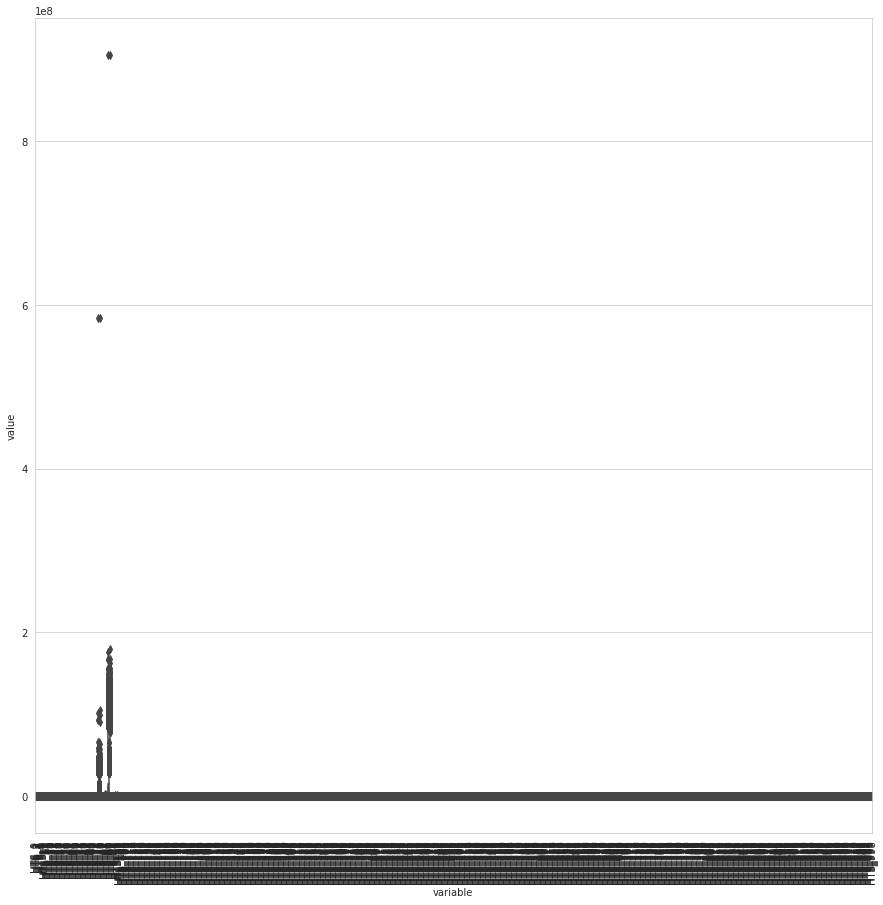

In [ ]:
#Box plot 
data_vis = pd.melt(df.iloc[:,0:1000],
                     id_vars = ["Molecule Name"] )  #Box plot for first 1000 features
plt.figure(figsize=(15,15))
sns.boxplot(x="variable", y="value", data=data_vis)
plt.xticks(rotation=90)

# Scatter plot between the variables 
# from pandas.plotting import scatter_matrix 
# scatter_matrix(df, figsize=(8,4))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

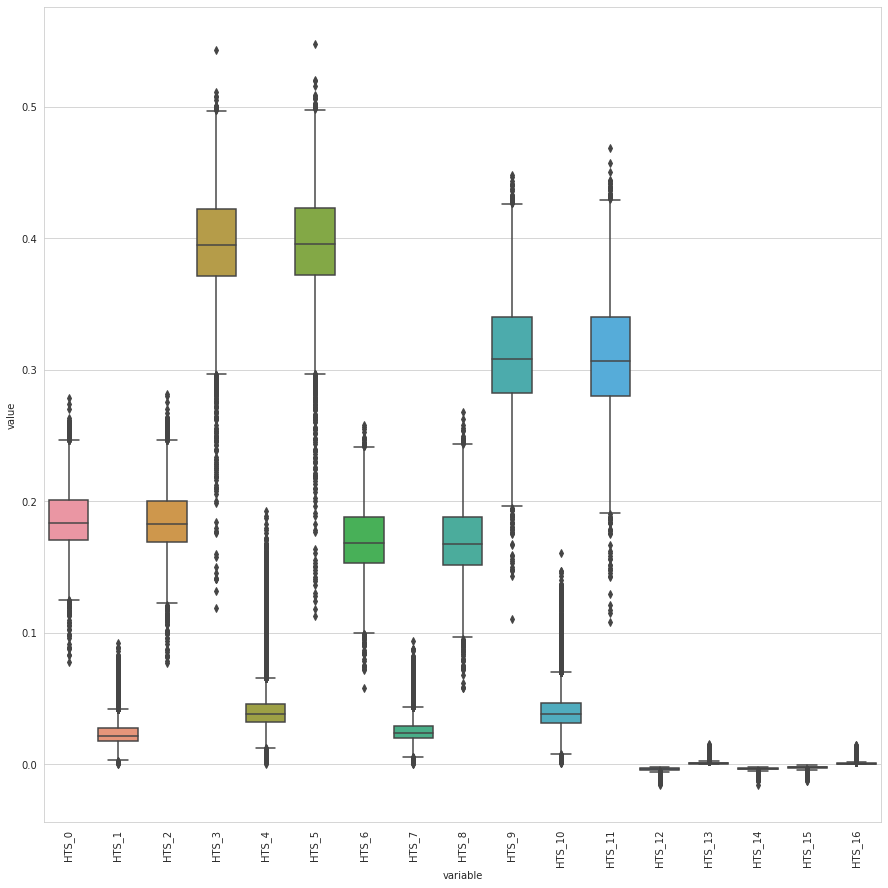

In [ ]:
data_vis = pd.melt(df.iloc[:,0:18],
                     id_vars = ["Molecule Name"] ) #Box plot for first 18 features
plt.figure(figsize=(15,15))
sns.boxplot(x="variable", y="value", data=data_vis)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

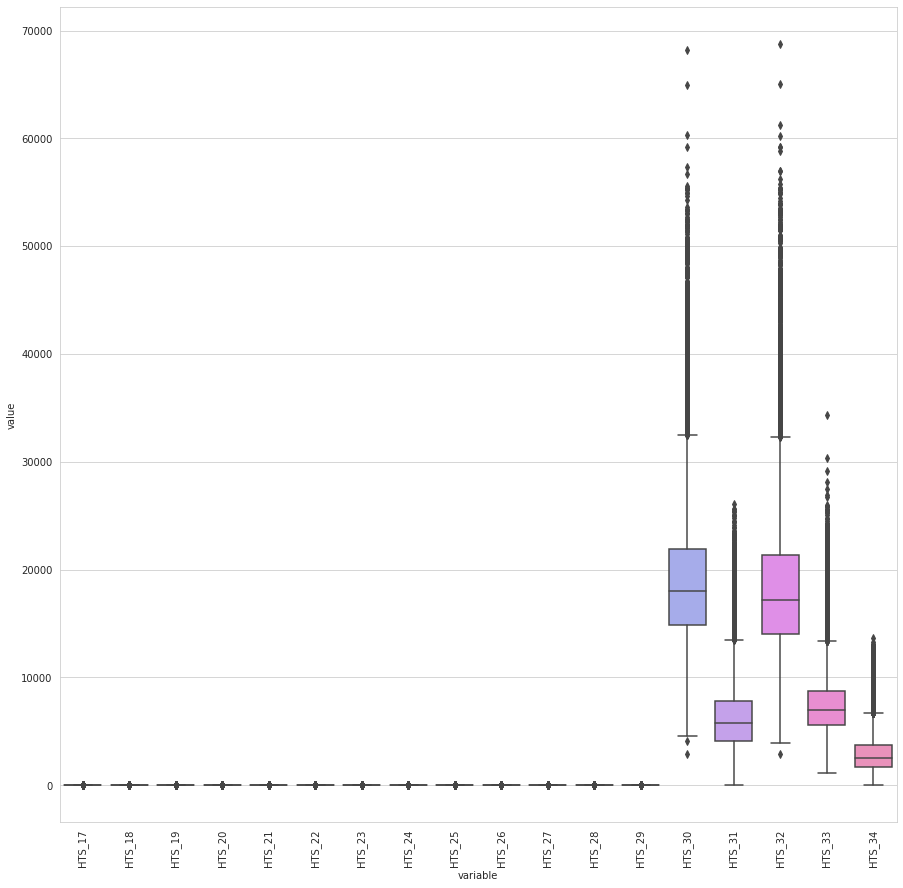

In [ ]:
data_vis = pd.concat([df['Molecule Name'],df.iloc[:,18:36]],axis=1) #Box plot for second set of 18 features
data_vis = pd.melt(data_vis,
                     id_vars = ["Molecule Name"])
plt.figure(figsize=(15,15))
sns.boxplot(x="variable", y="value", data=data_vis)
plt.xticks(rotation=90)

# Preprocessing 

  Handling of NaN/Null values: 
  
    Dropping the rows with 20% NaN values
    Replacing the Nan Values with mean using SimpleImputer

In [ ]:
max(data.isnull().sum()) #checking for missing values 

846

In [ ]:
#finding count of missing values in a row
nan_rows=[]
for index, row in data.iterrows(): 
  nan_rows.append((data.loc[[index]].isna().sum().sum(),index))

#finding rows with 20% missing values 
dropindex=[]
for x in nan_rows:
    if x[0]>200:
      dropindex.append(x[1])

#dropping rows with 20% missing values 
data_update = data.drop(dropindex)

In [ ]:
dropindex #index values to be dropped

[393, 583, 1236, 1874, 1984]

In [ ]:
# fitting the missing values with mean 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data_update)
  
data_update= imputer.transform(data_update) #outputs numpy array after the transformation 
data_update = pd.DataFrame(data_update) #convert numpy array to dataframe

In [ ]:
max(data_update.isnull().sum()) #checking for missing values after the transform 

0

In [ ]:
data_update.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
count,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,...,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,3495

Scaling of Values 

In [ ]:
#RobustScaler is used for scaling as the data has outliers 
from sklearn.preprocessing import RobustScaler
trans = RobustScaler() 
data_trans = trans.fit_transform(data_update)

In [ ]:
data_trans= pd.DataFrame(data_trans)

In [ ]:
data_trans.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
count,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,...,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,34955.000000,3495

# Detecting Outliers 

## InterQuartile Range - IQR

In [ ]:
data_1 = data_update.copy() #without scaling
#data_1 = data_trans.copy() #with scaling

In [ ]:
def detect_outliers_IQR(df, columns):
    """
    :Input df: input dataframe
    :Input features: features of the dataframe for outlier detection
    :return: df: dataframe with -1(Outliers) and 1(Inliers) values
    """
    # For each feature find the data points with extreme high or low values
    for feature in columns:
        Q1 = df[feature].quantile(0.03)
        Q3 = df[feature].quantile(0.97)

        step = 1.5 * (Q3 - Q1)

        # finding any points outside of Q1 - step and Q3 + step
        df.loc[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step)), feature] = -1
        df.loc[(df[feature] >= Q1 - step) & (df[feature] <= Q3 + step), feature] = 1
    return df

In [ ]:
df_IQR = detect_outliers_IQR(data_1, data_1.keys()) 
df_IQR['IQR_sum'] = df_IQR.sum(axis =1) #Sum of the row values and store it in IQR_sum column 
df_IQR['IQR_label'] = np.where(df_IQR['IQR_sum']<max(df_IQR['IQR_sum']),-1,1) # If the sum < 1023 , then its an outlier or its not an outlier 
print('No of outlier detected by IQR ',df_IQR['IQR_label'].value_counts())

No of outlier detected by IQR   1    31432
-1     3523
Name: IQR_label, dtype: int64


In [ ]:
data_update['IQR_label'] = df_IQR['IQR_label'] #Adding the IQR decision to the dataframe 

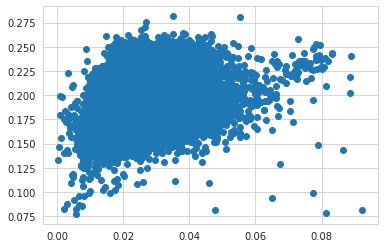

In [ ]:
plt.scatter(data_update[1],data_update[2])
plt.show()

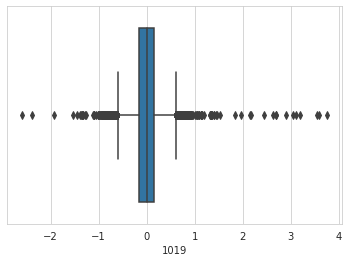

In [ ]:
sns.boxplot(x =data_update[1019])

In [ ]:
data_update['IQR_label'].value_counts()  #No of outliers detected by InterQuratile Range 

 1    31432
-1     3523
Name: IQR_label, dtype: int64

# Z-score  TODO


     *  Trying Z score as an inital step to see if there are any outliers with a
        threshold deviation = 2.

     *  Its a kind of a brute force method , also it is sensitive to extreme values( It uses mean which itself is sensitive to extreme values)

     Zscore performs well if the underlying data is Gaussian. Not all the features have Gaussain distribution so this method was not used.

In [ ]:
# data_z = data_update.copy()
# data_z = data_z.drop('IQR_label',axis=1)

In [ ]:
# from scipy.stats import zscore
# data_z.apply(zscore)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
0,0.229356,1.233318,0.096695,0.221080,0.929129,0.188717,0.238621,1.329796,0.158970,0.251598,1.356002,0.161643,-0.036612,0.872631,0.292881,-0.023715,0.887037,0.329084,-0.174834,0.838289,-0.356818,-0.228961,1.008441,-0.144865,-0.029311,0.684607,-0.024321,0.096578,0.753550,0.173376,0.172984,1.058858,0.008967,0.153121,1.046857,-0.058169,-0.126678,0.665705,-0.225407,-0.072192,0.220346,-0.120963,0.164026,1.087361,0.082552,0.156870,0.747718,0.139132,0.193878,0.902106,0.078702,0.176200,1.029815,0.143121,0.188999,0.987031,0.169235,-0.054175,0.862876,0.292030,-0.033934,0.880188,0.329227,-0.108884,0.703947,-0.323963,-0.163862,0.871040,-0.117658,0.013229,0.706522,0.035505,0.087599,0.717139,0.160121,-0.016471,0.409457,-0.007993,-0.018426,0.303232,-0.005060,-0.016471,0.409457,-0.007993,-0.005952,0.351273,-0.005740,0.020887,1.057054,-0.126745,-0.007686,0.986349,-0.166200,0.020887,1.057054,-0.126745,0.056032,0.953563,-0.281313,-0.012252,1.917148,0.088363,0.462932,0.157593,0.416530,0.397452,-0.003704,0.387143,0.478978,0.154721,0.450652,0.508183,0.138043,0.475743,0.051575,0.646635,0.013677,0.038103,0.672358,0.026320,-0.257751,0.374797,-0.235379,-0.409800,0.010059,...,-0.075405,-0.020669,-0.006031,-0.031983,-0.005493,-0.042157,0.287515,-0.083263,-0.044676,0.063371,-0.058361,-0.042157,0.287515,-0.083263,-0.000835,0.089606,-0.045525,0.034053,-0.046023,0.016484,0.477211,0.143912,0.429370,0.400175,-0.061487,0.387320,0.489478,0.083807,0.461563,0.517632,0.098032,0.485203,0.085468,-0.692906,0.077949,0.069723,-0.750171,0.093161,-0.292076,-0.068927,-0.265249,-0.420567,0.036856,-0.409025,-0.049017,0.020488,-0.069616,0.295089,0.004114,0.267941,0.331875,0.277688,0.259206,0.310559,0.314656,0.219266,-0.176975,0.028987,-0.131347,-0.067871,-0.291459,-0.056738,0.316019,-0.008829,0.259821,0.242060,-0.121618,0.219977,0.372334,0.298295,0.296795,0.333895,-0.105237,0.296878,0.360123,-0.089130,0.320533,0.147353,-0.698003,0.145819,0.092457,-0.785227,0.107388,-0.142597,-0.197567,-0.138122,-0.270887,-0.089475,-0.242356,0.060234,0.056889,0.022893,0.287115,-0.007534,0.273095,-0.210087,-1.275326,-0.198870,-0.192057,-0.544323,-0.217898,-0.210087,-1.275326,-0.198870,-0.861089,-1.275483,-0.068112,-0.037213,0.257884,-0.103249,-0.079629,-0.017376,-0.109880,-0.037213,0.257884,-0.105613,0.039761,-0.122074,-0.027531,0.026259,-0.301716,0.008755,-1.251256,184.205589,184.272871
1,-0.789139,-0.584920,-0.792139,-0.761286,-0.199880,-0.844207,-0.653414,-0.387695,-0.619523,-0.666006,-0.108073,-0.761632,0.708652,-0.590358,0.696068,0.669101,-0.555171,0.561502,-0.319402,-0.432987,-0.397074,0.791444,-0.323785,0.835454,0.273975,-0.811446,0.593862,0.049907,-0.521534,0.039520,-0.105529,-0.547791,0.025862,-0.216217,-0.527664,-0.216499,-0.206059,0.519649,0.073065,-0.248005,-0.669929,-0.299938,-0.848676,0.393118,-0.913824,-0.828981,0.881956,-0.576683,0.065071,-0.479886,0.210516,-0.681813,0.674973,-0.477996,-0.659231,0.918485,-0.588879,0.710857,-0.597986,0.599747,0.675350,-0.574992,0.608311,-0.417531,-0.552743,-0.478330,0.903673,0.621955,0.635375,0.440506,-1.005642,0.607938,0.085566,-0.588428,0.34624

In [ ]:
# columns = data_z.keys()
# for feature in columns:
#     data_z.loc[data_z[feature] > 1, feature] = -1
#     data_z.loc[data_z[feature] < 1, feature] = 1

In [ ]:
# data_z

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

In [ ]:
# data_z['Z_sum'] = data_z.sum(axis =1) #Sum of the row values and store it in IQR_sum column 
# # data_z['Z_label'] = np.where(data_z['Z_sum']<max(data_z['Z_sum']),-1,1) # If the sum < 1023 , then its an outlier or its not an outlier 
# # print('No of outlier detected by IQR ',data_z['Z_label'].value_counts())

In [ ]:
# min(data_z['Z_sum'])

1023.0

In [ ]:
# print(df.keys())

Index(['Unnamed: 0', 'Molecule Name', 'HTS_0', 'HTS_1', 'HTS_2', 'HTS_3',
       'HTS_4', 'HTS_5', 'HTS_6', 'HTS_7',
       ...
       'HTS_1013', 'HTS_1014', 'HTS_1015', 'HTS_1016', 'HTS_1017', 'HTS_1018',
       'HTS_1019', 'SYS_0', 'SYS_1', 'SYS_2'],
      dtype='object', length=1025)


In [ ]:
#considering only two columns for creating a baseline model 
# Name = 'Molecule Name'
# x1 = 'SYS_1'
# x2 = 'SYS_2'

# data = df[[Name,x1,x2]]

In [ ]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34960 entries, 0 to 34959
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Molecule Name  34955 non-null  object 
 1   SYS_1          34955 non-null  float64
 2   SYS_2          34955 non-null  float64
dtypes: float64(2), object(1)
memory usage: 819.5+ KB


In [ ]:
#checking for Nan values in specific column 
# np.isnan(data['SYS_1']).values.sum()
#Dropping the rows with NaN values 
# data = data.dropna(axis=0)
# data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34955 entries, 0 to 34959
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Molecule Name  34955 non-null  object 
 1   SYS_1          34955 non-null  float64
 2   SYS_2          34955 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
# X = data[[x1,x2]]

# IsolationForest

In [ ]:
data_IF = data_update.copy()  #creating a copy of the dataframe
data_IF = data_IF.drop('IQR_label',axis=1)

In [ ]:
clf = IsolationForest(max_samples='auto', random_state = 1, contamination= 0.02)#calling the isolation forest method with 2% contamination 
preds = clf.fit_predict(data_IF)
data_update['isolationForest_outliers'] = preds
data_update['isolationForest_outliers'] = data_update['isolationForest_outliers'].astype(str)
data_update['isolationForest_scores'] = clf.decision_function(data_IF)
print(data_update['isolationForest_outliers'].value_counts())

1     34255
-1      700
Name: isoletionForest_outliers, dtype: int64


In [ ]:
#Visualization 
# fig = px.scatter(data, x=x1, y=x2, color='isoletionForest_outliers', hover_name=Name)
# fig.update_layout(title='Isolation Forest Outlier Detection', title_x=0.5, yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
# fig.show()

In [ ]:
# fig = px.scatter(data, x=x1, y=x2, color="isoletionForest_scores")
# fig.update_layout(title='Isolation Forest Outlier Detection (scores)', title_x=0.5,yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
# fig.show()

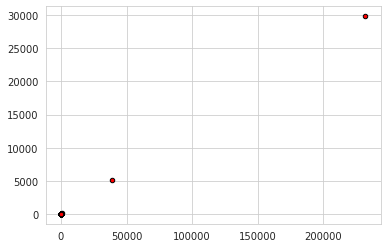

In [ ]:
# X_inliers = data.loc[data['isoletionForest_outliers']=='1'][[x1,x2]]
# X_outliers = data.loc[data['isoletionForest_outliers']=='-1'][[x1,x2]]

# plt.scatter(X_inliers.iloc[:, 0], X_inliers.iloc[:, 1], c='white', s=20, edgecolor='k')
# plt.scatter(X_outliers.iloc[:, 0], X_outliers.iloc[:, 1], c='red',s=20, edgecolor='k')
# plt.show()

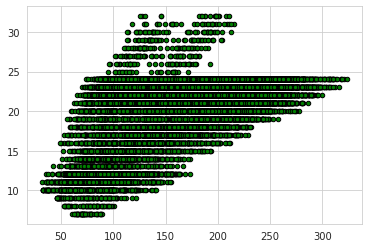

In [ ]:
# inl = plt.scatter(X_inliers.iloc[:, 0], X_inliers.iloc[:, 1], c='green', s=20, edgecolor='k')

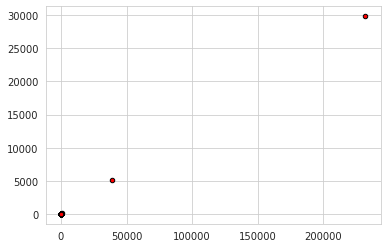

In [ ]:
# outl = plt.scatter(X_outliers.iloc[:, 0], X_outliers.iloc[:, 1], c='red',s=20, edgecolor='k')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



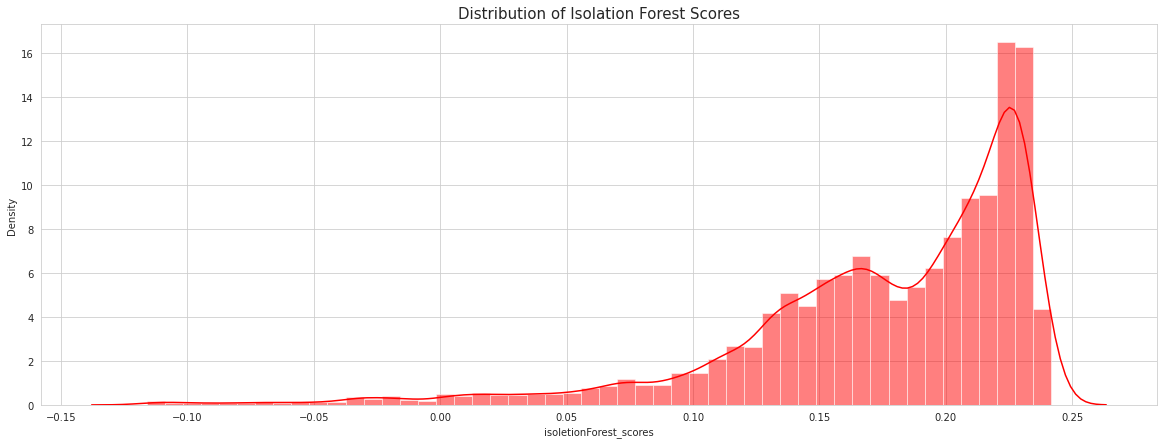

In [ ]:
# fig, ax = plt.subplots(figsize=(20, 7))
# ax.set_title('Distribution of Isolation Forest Scores', fontsize = 15, loc='center')
# sns.distplot(data['isoletionForest_scores'],color='red',label='if',hist_kws = {"alpha": 0.5});

# DBSCAN

In [ ]:
data_DBS = data_update.copy()
data_DBS = data_DBS.drop(['IQR_label','isolationForest_outliers','isolationForest_scores'],axis=1)

In [ ]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps = 300, metric='euclidean', min_samples = 2000,n_jobs = -1)
clusters = outlier_detection.fit_predict(data_DBS)

data_update['dbscan_outliers'] = clusters
data_update['dbscan_outliers'] = data_update['dbscan_outliers'].apply(lambda x: str(1) if x>-1 else str(-1))
print(data_update['dbscan_outliers'].value_counts())

-1    34955
Name: dbscan_outliers, dtype: int64


# Local Outlier Factor 

In [ ]:
data_LOF = data_update.copy()
data_LOF = data_LOF.drop(['IQR_label','isolationForest_outliers','isolationForest_scores'],axis=1)

In [ ]:
clf = LocalOutlierFactor(n_neighbors=100) #calling LOR with neighbor 100
y_pred = clf.fit_predict(data_LOF)

data_update['localOutlierFactor_outliers'] = y_pred.astype(str)
print(data_update['localOutlierFactor_outliers'].value_counts())
data_update['localOutlierFactor_scores'] = clf.negative_outlier_factor_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



1     34249
-1      706
Name: localOutlierFactor_outliers, dtype: int64


In [ ]:
# fig = px.scatter(data, x=x1, y=x2, color='localOutlierFactor_outliers', hover_name=Name)
# fig.update_layout(title='Local Outlier Factor Outlier Detection', title_x=0.5, yaxis=dict(gridcolor = '#DFEAF4'), xaxis=dict(gridcolor = '#DFEAF4'), plot_bgcolor='white')
# fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



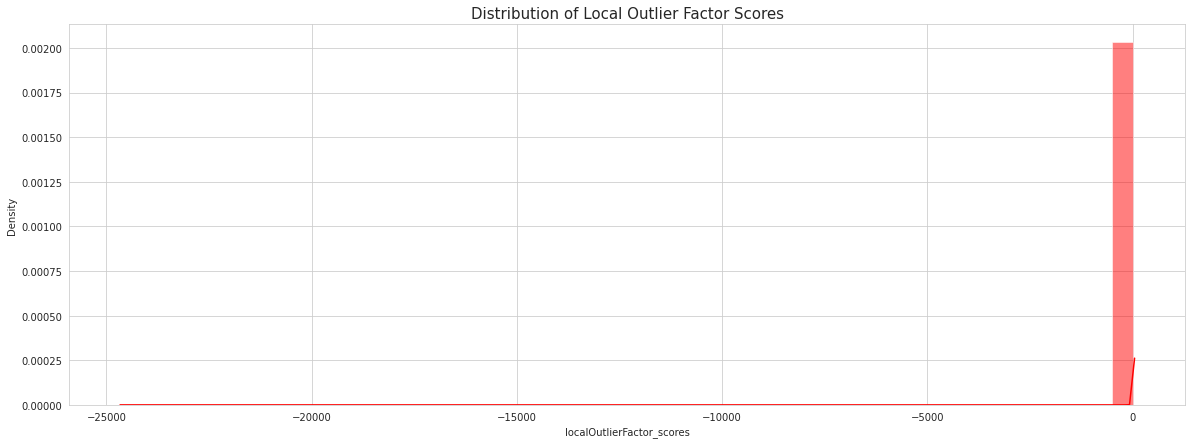

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Distribution of Local Outlier Factor Scores', fontsize = 15, loc='center')
sns.distplot(data['localOutlierFactor_scores'],color='red',label='eif',hist_kws = {"alpha": 0.5});

# Ensemble of Models 

In [ ]:

# data_update --> is the dataframe with IQR, Isolation forest and LOR Model predictions 
# A new column 'outliers_sum' is created by summing the decision of IQR, Isolation forest and LOR models 
# 3 --> all the three models predicited the datapoint as Inlier 
# 1 --> Two out of three models predicted the datapoint as Inlier 
# -1 --> Two out of three models predicted the datapoint as Outlier
# -3 --> all the three models predicited the datapoint as Outlier 

data_update['outliers_sum'] = data_update['isolationForest_outliers'].astype(int)+data_update['localOutlierFactor_outliers'].astype(int)+data_update['IQR_label'].astype(int)

In [ ]:
data_update['outliers_sum'].value_counts()

 3    31151
 1     2887
-1      709
-3      208
Name: outliers_sum, dtype: int64

In [ ]:
#Final Outlier label is created if the outliers_sum < 3 which means even if one of the models predicted the datapoint as outlier then it is labelled as an Outlier 
# This decision was made as we dont want to miss any Outlier point
data_update['En_label'] = np.where(data_update['outliers_sum']<max(data_update['outliers_sum']),-1,1) # If the sum < 1023 , then its an outlier or its not an outlier 

In [ ]:
data_update['En_label'].value_counts()

 1    31151
-1     3804
Name: En_label, dtype: int64

# Supervised Dataset based on Ensemble results

In [ ]:
df_data = data_update.copy()

In [ ]:
df_data = df_data.drop(['IQR_label','isolationForest_outliers','isolationForest_scores','dbscan_outliers','localOutlierFactor_outliers','localOutlierFactor_scores','outliers_sum'],axis=1)

In [ ]:
df_data.info() #Final dataframe with Outlier label 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34955 entries, 0 to 34954
Columns: 1024 entries, 0 to En_label
dtypes: float64(1023), int64(1)
memory usage: 273.1 MB


In [ ]:
#Feature selection based on the correlation matrix 
corr_matrix = df_data.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
df_data_corr = df_data.copy()

In [ ]:
df_data_corr= df_data_corr.drop (to_drop,axis = 1)

In [ ]:
df_data_corr.shape #dataframe after the featire selection process

(34955, 384)

In [ ]:
#splitting the data into train and test set 
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_data_corr, test_size=0.2, random_state=25) 

In [ ]:
train_data['En_label'].value_counts()

 1    24934
-1     3030
Name: En_label, dtype: int64

In [ ]:
test_data['En_label'].value_counts()

 1    6217
-1     774
Name: En_label, dtype: int64

In [ ]:
#Again splitting the train data into train and validation set 
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=25)

In [ ]:
train_data['En_label'].value_counts()

 1    19934
-1     2437
Name: En_label, dtype: int64

In [ ]:
val_data['En_label'].value_counts()

 1    5000
-1     593
Name: En_label, dtype: int64

In [ ]:
#Training Data 
X_train = train_data
X_train= X_train.drop('En_label',axis = 1)
y_train = train_data['En_label']

In [ ]:
X_train.shape, y_train.shape #trainig data shape 

((22371, 383), (22371,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



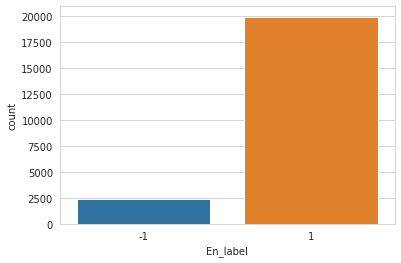

In [ ]:
ax = sns.countplot(y_train) #Unbalanced data 

In [ ]:
#Validation data 
X_val = val_data
X_val= X_val.drop('En_label',axis = 1)
y_val = val_data['En_label']

In [ ]:
X_val.shape, y_val.shape #validation data shape 

((5593, 383), (5593,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



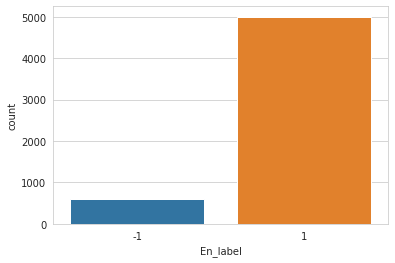

In [ ]:
ax = sns.countplot(y_val) #Unbalanced validation data 

In [ ]:
#Test data 
X_test = test_data
X_test= X_test.drop('En_label',axis = 1)
y_test = test_data['En_label']

In [ ]:
X_test.shape, y_test.shape  #test data shape 

((6991, 383), (6991,))

In [ ]:
y_test.value_counts()

 1    6217
-1     774
Name: En_label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



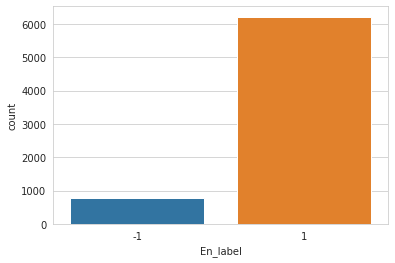

In [ ]:
ax = sns.countplot(y_test)#Unbalanced test data 

# DNN Model for Classification 

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow import keras

In [ ]:
NN_model = Sequential()

In [ ]:
NN_model.add(Dense(383,input_dim = X_train.shape[1], activation='relu')) #input no fo neurons = No of features 
# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(100,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1,activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001) #adam optimizer 
NN_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
NN_model.summary()
early_stopping_monitor = EarlyStopping(patience=5) #regularization technique to prevent overfitting
callbacks_list = [early_stopping_monitor]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 383)               147072    
                                                                 
 dense_21 (Dense)            (None, 256)               98304     
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 100)               25700     
                                                                 
 dense_24 (Dense)            (None, 1)                 101       
                                                                 
Total params: 336,969
Trainable params: 336,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model fit
NN_model.fit(X_train, y_train, epochs=3, batch_size=20, validation_data  = (X_val,y_val), callbacks=callbacks_list )

Epoch 1/3
1119/1119 [==============================] - 7s 6ms/step - loss: -87048713528147968.0000 - acc: 0.8911 - val_loss: -58945239271866368.0000 - val_acc: 0.8940
Epoch 2/3
1119/1119 [==============================] - 6s 5ms/step - loss: -97325943202250752.0000 - acc: 0.8911 - val_loss: -66858995687620608.0000 - val_acc: 0.8940
Epoch 3/3
1119/1119 [==============================] - 6s 5ms/step - loss: -110947887248048128.0000 - acc: 0.8911 - val_loss: -76084813072695296.0000 - val_acc: 0.8940


In [ ]:
loss, acc = NN_model.evaluate(X_test, y_test) #model evaluation
print('Accuracy: %.3f' % acc)

219/219 [==============================] - 1s 6ms/step - loss: 0.5287 - acc: 0.8893
Accuracy: 0.889


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = NN_model.predict(X_test) 
# y_pred = NN_model.predict_classes(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))

Confusion Matrix
[[   0    0]
 [ 774 6217]]
Classification Report
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         1.0       1.00      0.89      0.94      6991

    accuracy                           0.89      6991
   macro avg       0.50      0.44      0.47      6991
weighted avg       1.00      0.89      0.94      6991



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [ ]:
X_test.shape

(6991, 383)

In [ ]:
y_test.value_counts()

 1    6217
-1     774
Name: En_label, dtype: int64

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [ ]:
clf = LogisticRegression(random_state=42) #callling logistic regression
clf.fit(X_train, y_train) #fit the data 

LogisticRegression(random_state=42)

Validation Performance:
Accuracy: 0.9047023064544967 , Misclassification error: 0.09529769354550333
Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

          -1       0.94      0.11      0.19       593
           1       0.90      1.00      0.95      5000

    accuracy                           0.90      5593
   macro avg       0.92      0.55      0.57      5593
weighted avg       0.91      0.90      0.87      5593


Confusion matrix:
[[  64  529]
 [   4 4996]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



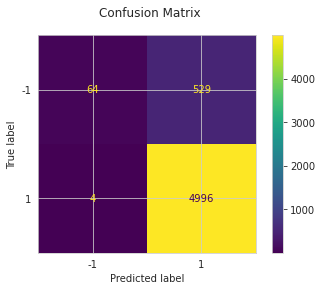

In [ ]:
print('Validation Performance:')
y_pred = clf.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(clf, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9043055356887427 , Test Misclassification error: 0.09529769354550333
Testdata Classification report for classifier LogisticRegression(random_state=42):
              precision    recall  f1-score   support

          -1       0.91      0.15      0.26       774
           1       0.90      1.00      0.95      6217

    accuracy                           0.90      6991
   macro avg       0.91      0.57      0.60      6991
weighted avg       0.90      0.90      0.87      6991


Testdata Confusion matrix:
[[ 117  657]
 [  12 6205]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



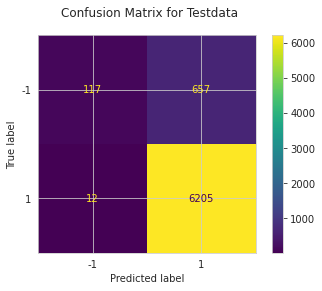

In [ ]:
print('Test Performance:')
y_pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3) #Initializing K-Nearest Neighbhors with K = 3
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Validation Performance:
Accuracy: 0.8988020740210978 , Misclassification error: 0.1011979259789022
Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

          -1       0.55      0.24      0.33       593
           1       0.92      0.98      0.95      5000

    accuracy                           0.90      5593
   macro avg       0.73      0.61      0.64      5593
weighted avg       0.88      0.90      0.88      5593




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Confusion matrix:
[[ 142  451]
 [ 115 4885]]


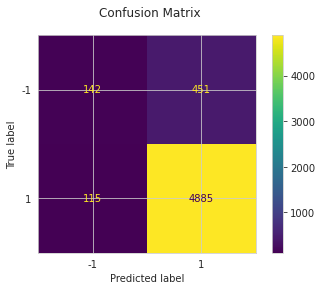

In [ ]:
print('Validation Performance:')
y_pred = neigh.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(neigh, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.8981547704191103 , Test Misclassification error: 0.1011979259789022
Testdata Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

          -1       0.58      0.28      0.38       774
           1       0.92      0.97      0.94      6217

    accuracy                           0.90      6991
   macro avg       0.75      0.63      0.66      6991
weighted avg       0.88      0.90      0.88      6991


Testdata Confusion matrix:
[[ 220  554]
 [ 158 6059]]


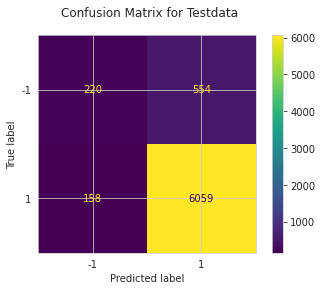

In [ ]:
print('Test Performance:')
y_pred_test = neigh.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(neigh, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Linear Discriminant Analysis (LDA)

In [ ]:
lda = LinearDiscriminantAnalysis(solver='svd') #Initializing LDA

Validation Performance:
Accuracy: 0.9486858573216521 , Misclassification error: 0.051314142678347885
Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

          -1       0.92      0.57      0.70       593
           1       0.95      0.99      0.97      5000

    accuracy                           0.95      5593
   macro avg       0.93      0.78      0.84      5593
weighted avg       0.95      0.95      0.94      5593


Confusion matrix:
[[ 337  256]
 [  31 4969]]


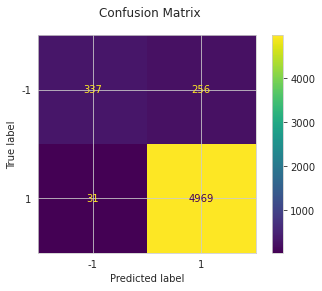

In [ ]:
print('Validation Performance:')
y_pred = lda.fit(X_train, y_train).predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(lda, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9483621799456444 , Test Misclassification error: 0.051314142678347885
Testdata Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

          -1       0.89      0.61      0.72       774
           1       0.95      0.99      0.97      6217

    accuracy                           0.95      6991
   macro avg       0.92      0.80      0.85      6991
weighted avg       0.95      0.95      0.94      6991


Testdata Confusion matrix:
[[ 470  304]
 [  57 6160]]


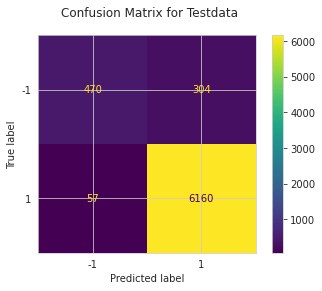

In [ ]:
print('Test Performance:')
y_pred_test = lda.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(lda, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Decision Tree

In [ ]:
DTclf = DecisionTreeClassifier(random_state=0) #Initializing decision tree
DTclf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Validation Performance:
Accuracy: 0.9644198104773825 , Misclassification error: 0.035580189522617545
Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

          -1       0.82      0.85      0.83       593
           1       0.98      0.98      0.98      5000

    accuracy                           0.96      5593
   macro avg       0.90      0.91      0.91      5593
weighted avg       0.96      0.96      0.96      5593


Confusion matrix:
[[ 503   90]
 [ 109 4891]]


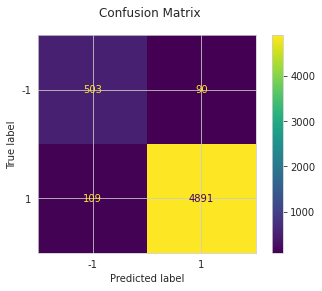

In [ ]:
print('Validation Performance:')
y_pred = DTclf.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {DTclf}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(DTclf, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9679588041767987 , Test Misclassification error: 0.035580189522617545
Testdata Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

          -1       0.85      0.86      0.86       774
           1       0.98      0.98      0.98      6217

    accuracy                           0.97      6991
   macro avg       0.92      0.92      0.92      6991
weighted avg       0.97      0.97      0.97      6991


Testdata Confusion matrix:
[[ 668  106]
 [ 118 6099]]


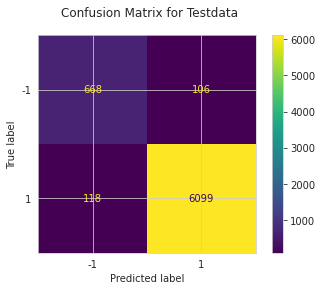

In [ ]:
print('Test Performance:')
y_pred_test = DTclf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {DTclf}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(DTclf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# GradientBoostingClassifier

In [ ]:
boostclass = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, random_state=1)#Initializing boosting algorithm
boostclass.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1)

375    0.000000
495    0.000000
494    0.000000
493    0.000000
492    0.000000
         ...   
694    6.649058
403   10.285432
301   11.024969
628   14.512755
693   21.805801
Length: 383, dtype: float64


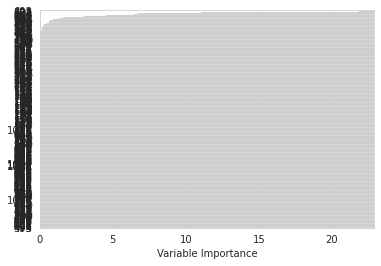

In [ ]:
#Visualising the important features
feature_importance = boostclass.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X_train.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Validation Performance:
Accuracy: 0.9191846951546576 , Misclassification error: 0.08081530484534238
Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

          -1       0.99      0.24      0.39       593
           1       0.92      1.00      0.96      5000

    accuracy                           0.92      5593
   macro avg       0.96      0.62      0.67      5593
weighted avg       0.93      0.92      0.90      5593


Confusion matrix:
[[ 142  451]
 [   1 4999]]


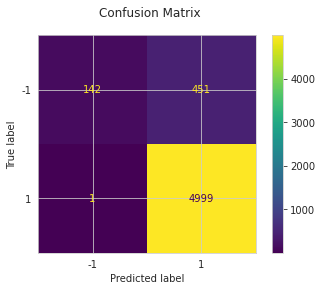

In [ ]:
print('Validation Performance:')
y_pred = boostclass.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Test Performance:
Test Accuracy: 0.9154627378057503 , Test Misclassification error: 0.08081530484534238
Testdata Classification report for classifier GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000,
                           random_state=1):
              precision    recall  f1-score   support

          -1       0.99      0.24      0.38       774
           1       0.91      1.00      0.95      6217

    accuracy                           0.92      6991
   macro avg       0.95      0.62      0.67      6991
weighted avg       0.92      0.92      0.89      6991


Testdata Confusion matrix:
[[ 184  590]
 [   1 6216]]


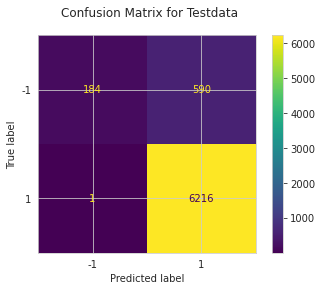

In [ ]:
print('Test Performance:')
y_pred_test = boostclass.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {boostclass}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(boostclass, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# SVM 

In [ ]:
  #Couldnot run -Taking unsually longer time 
  svc = svm.SVC(kernel='linear', C=1, gamma='auto').fit(X_train, y_train)

In [ ]:
print('Validation Performance:')
y_pred = svc.predict(X_val) #prediction for validation dataset 
acc = accuracy_score(y_val, y_pred, normalize=True)
misclass_err = 1 - acc
print("Accuracy:", acc, ", Misclassification error:", misclass_err)

print(f"Classification report for classifier {svc}:\n"
f"{metrics.classification_report(y_val, y_pred)}\n")

disp = metrics.plot_confusion_matrix(svc, X_val, y_val)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [ ]:
print('Test Performance:')
y_pred_test = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred_test, normalize=True)
misclass_err_test = 1 - acc
print("Test Accuracy:", acc, ", Test Misclassification error:", misclass_err)

print(f"Testdata Classification report for classifier {svc}:\n"
f"{metrics.classification_report(y_test, y_pred_test)}\n")

disp = metrics.plot_confusion_matrix(svc, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix for Testdata")
print(f"Testdata Confusion matrix:\n{disp.confusion_matrix}")
plt.show()